In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [14]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\Ecommerce Customers.fwf')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### Data information

In [15]:
df.shape

(500, 8)

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Null values

In [20]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### EDA

Text(0.5, 1.0, 'Avg. Session Length vs Yearly Amount Spent')

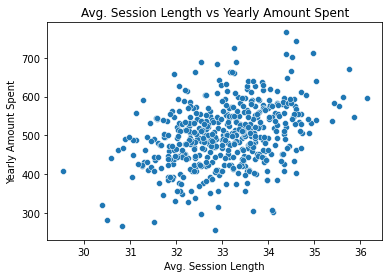

In [38]:
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=df)
plt.title('Avg. Session Length vs Yearly Amount Spent')

Text(0.5, 1.0, 'Time on App vs Yearly Amount Spent')

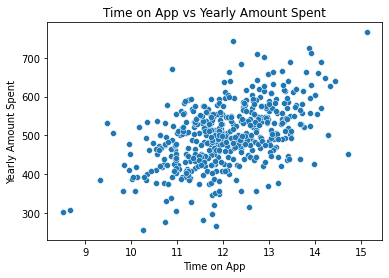

In [39]:
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.title('Time on App vs Yearly Amount Spent')

Text(0.5, 1.0, 'Time on Website vs Yearly Amount Spent')

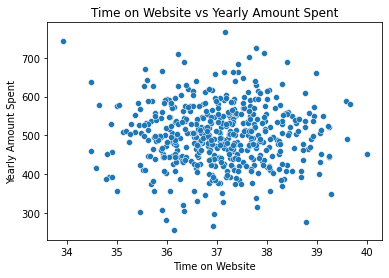

In [40]:
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.title('Time on Website vs Yearly Amount Spent')

Text(0.5, 1.0, 'Length of Membership vs Yearly Amount Spent')

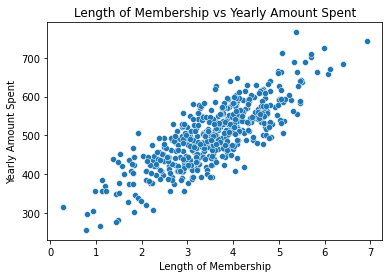

In [43]:
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.title('Length of Membership vs Yearly Amount Spent')

From above plots we conclude that as the Length of membership increases the Amount spent increases, both are positively correlated

#### Correlation

<AxesSubplot:>

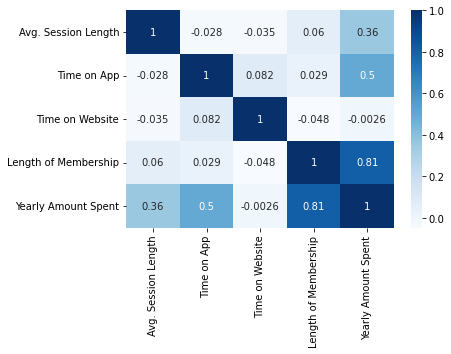

In [52]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

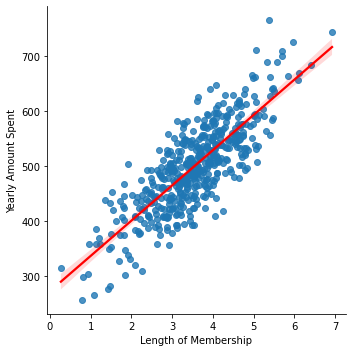

In [56]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=df, line_kws={'color':'Red'});

### Build linear regression model

#### Create Features & Label

In [57]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [58]:
X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

#### Split data into training & testing test

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print("Size of Training:", len(x_train))
print("Size of Testing:", len(y_test))

Size of Training: 400
Size of Testing: 100


#### Train the model

In [60]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(x_train,y_train)

#### Test the model

In [62]:
print("Training Accuracy", model.score(x_train, y_train))
print("Testing Accuracy", model.score(x_test, y_test))

Training Accuracy 0.9837380400055443
Testing Accuracy 0.9861924261981547


both accuracy are good hence no overfitting problem.

#### R2 Score & Performance parameters

In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
mae=mean_absolute_error(y_test, y_pred)
print("MAE", mae)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 92.8901030449852
MAE 7.645674798915288
RMSE: 9.637951185028133
R2: 0.9861924261981547


R2 score is good, around 83% predictions are accurate

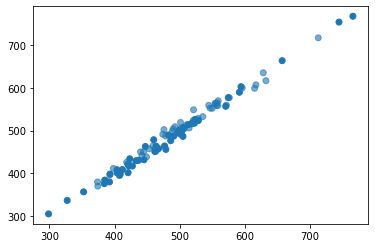

In [65]:
# represents data point of actual & predicted using scatter plot.
plt.scatter(y_test,y_pred,alpha=[0.6,1])